<a href="https://colab.research.google.com/github/dgx781/Deep-learning/blob/DataScience-Ocean/ResNet_50_on_flower_photos_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import PIL
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [26]:
import pathlib
dataset_url= "http://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos', origin= dataset_url, untar= True)
data_dir= pathlib.Path(data_dir)

In [27]:
print(data_dir)

/root/.keras/datasets/flower_photos


In [28]:
from PIL import Image

/root/.keras/datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg


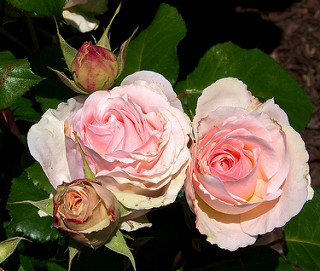

In [29]:
roses= list(data_dir.glob('roses/*'))
print(roses[0])
Image.open(str(roses[0]))

In [30]:
img_height, img_width= 224, 224
batch_size= 32
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed= 123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [31]:
val_ds= tf.keras.preprocessing.image_dataset_from_directory(
     data_dir,
     validation_split=0.2,
     subset="validation",
     seed= 123,
     label_mode= "categorical",
     image_size= (img_height, img_width),
     batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [32]:
class_names= train_ds.class_names
print(class_names[:5])

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [33]:
model= Sequential()

pretrained_model= tf.keras.applications.ResNet50(
 include_top= False,
 input_shape= (224, 224,3),
 pooling= "max",
 classes= 5,
 weights= "imagenet"
)

for layer in pretrained_model.layers:
  layer.trainable= False
model.add(pretrained_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(5, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(train_ds, validation_data= val_ds, epochs=3)

Epoch 1/3
92/92 [==============================] - 715s 8s/step - loss: 3.9226 - accuracy: 0.7234 - val_loss: 0.4697 - val_accuracy: 0.8379
Epoch 2/3
92/92 [==============================] - 693s 8s/step - loss: 0.3650 - accuracy: 0.8757 - val_loss: 0.3798 - val_accuracy: 0.8733
Epoch 3/3
92/92 [==============================] - 698s 8s/step - loss: 0.2006 - accuracy: 0.9254 - val_loss: 0.3786 - val_accuracy: 0.8638
